In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data, fix the file extension
df = pd.read_csv('train.csv')  # Correct the file extension to .csv
pd.set_option('display.max_columns', None)


print(df)
df.head()

df.isna().sum()



             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \


ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 


Unique Elements in 'Accounts Delinquent': 0    67463
Name: Accounts Delinquent, dtype: int64
Term values: 59    43780
58    22226
36     1457
Name: Term, dtype: int64
Payment Plan unique values: n    67463
Name: Payment Plan, dtype: int64
Verification Status unique values: Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64
Loan Title unique values: Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64


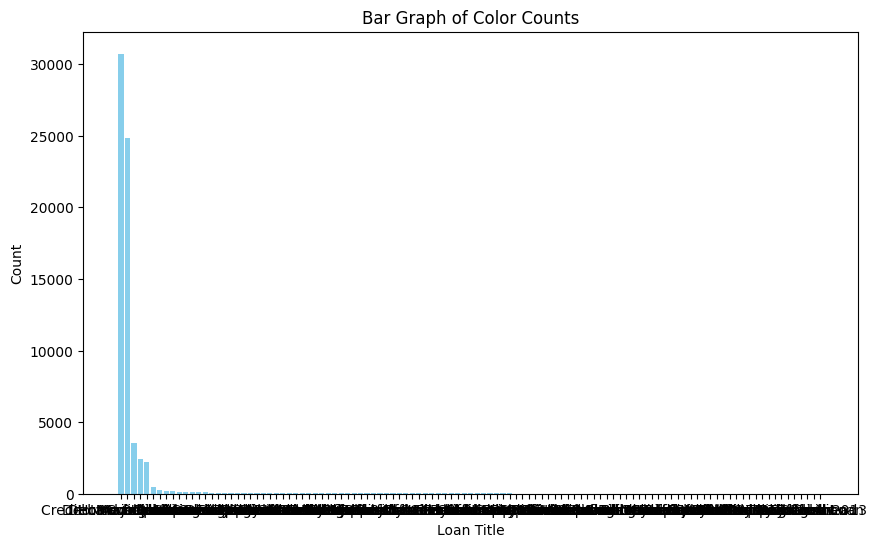

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [30]:
#verificar se há valores em falta
missing_values = df.isnull().sum()

print()
##print("Missing Values:")
#print(missing_values)

value_counts = df['Accounts Delinquent'].value_counts()
print(f"Unique Elements in 'Accounts Delinquent': {value_counts}")
#Account Delinquente é sempre igual a 0

value_counts = df['Term'].value_counts()
print(f"Term values: {value_counts}")

value_counts = df['Payment Plan'].value_counts()
print(f"Payment Plan unique values: {value_counts}")
#Payement plan é sempre igual a n

value_counts = df['Verification Status'].value_counts()
print(f"Verification Status unique values: {value_counts}")

value_counts = df['Loan Title'].value_counts()
print(f"Loan Title unique values: {value_counts}")

# Convert the Series to a DataFrame
value_counts_df = value_counts.reset_index()

value_counts_df.columns = ['Loan Title', 'Count']

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
plt.bar(value_counts_df['Loan Title'], value_counts_df['Count'], color='skyblue')
plt.title('Bar Graph of Color Counts')
plt.xlabel('Loan Title')
plt.ylabel('Count')
plt.show()

df.head()

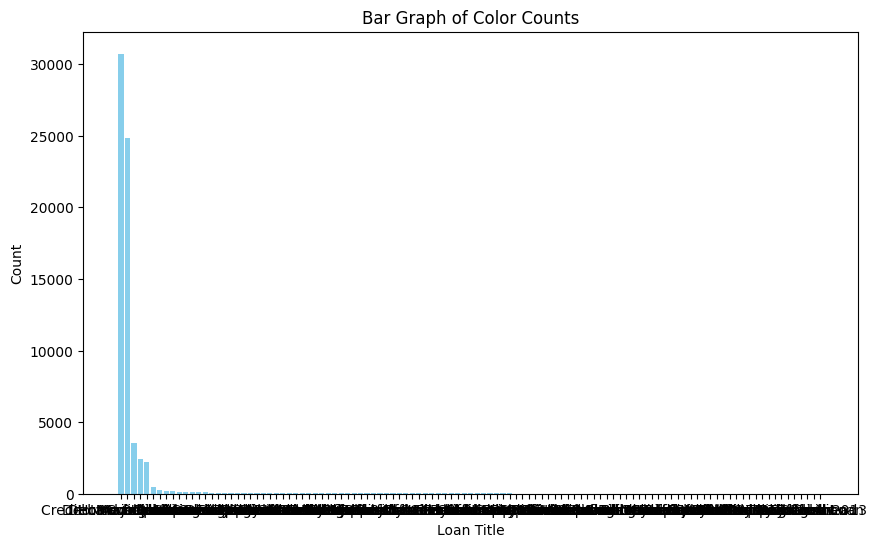

In [31]:
threshold = 100

value_counts_2 = df['Loan Title'].value_counts()

infrequent_categories = value_counts_2[value_counts_2 < threshold].index

df['Loan Title'] = df['Loan Title'].replace(infrequent_categories, 'Other')

value_counts_df_2 = value_counts_2.reset_index()

value_counts_df_2.columns = ['Loan Title', 'Count']

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
plt.bar(value_counts_df_2['Loan Title'], value_counts_df_2['Count'], color='skyblue')
plt.title('Bar Graph of Color Counts')
plt.xlabel('Loan Title')
plt.ylabel('Count')
plt.show()

In [8]:
df = df.drop(['Accounts Delinquent'],axis=1)
df = df.drop(['ID'] , axis=1)
df = df.drop(['Batch Enrolled'] , axis=1)
df = df.drop(['Sub Grade'] , axis=1)

In [2]:
#Explorar graficamente o atributo 'Loan Status'
print(df['Loan Status'])

df['Loan Status'] = df['Loan Status'].astype('category')
sns.set(style="whitegrid")

# Boxplot para os atributos numéricos:
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns
print(len(numerical_attributes))

plt.figure(figsize=(20,20))
for i, column in enumerate(numerical_attributes, 1):
    plt.subplot(8, 3, i)
    sns.boxplot(x='Loan Status', y=column, data=df)

# Histograma para os atributos categóricos:
categorical_attributes = df.select_dtypes(include='category').columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_attributes, 1):
   plt.subplot(3, 3, i)
   sns.countplot(x=column, hue='Loan Status', data=df)

plt.show()

NameError: name 'df' is not defined

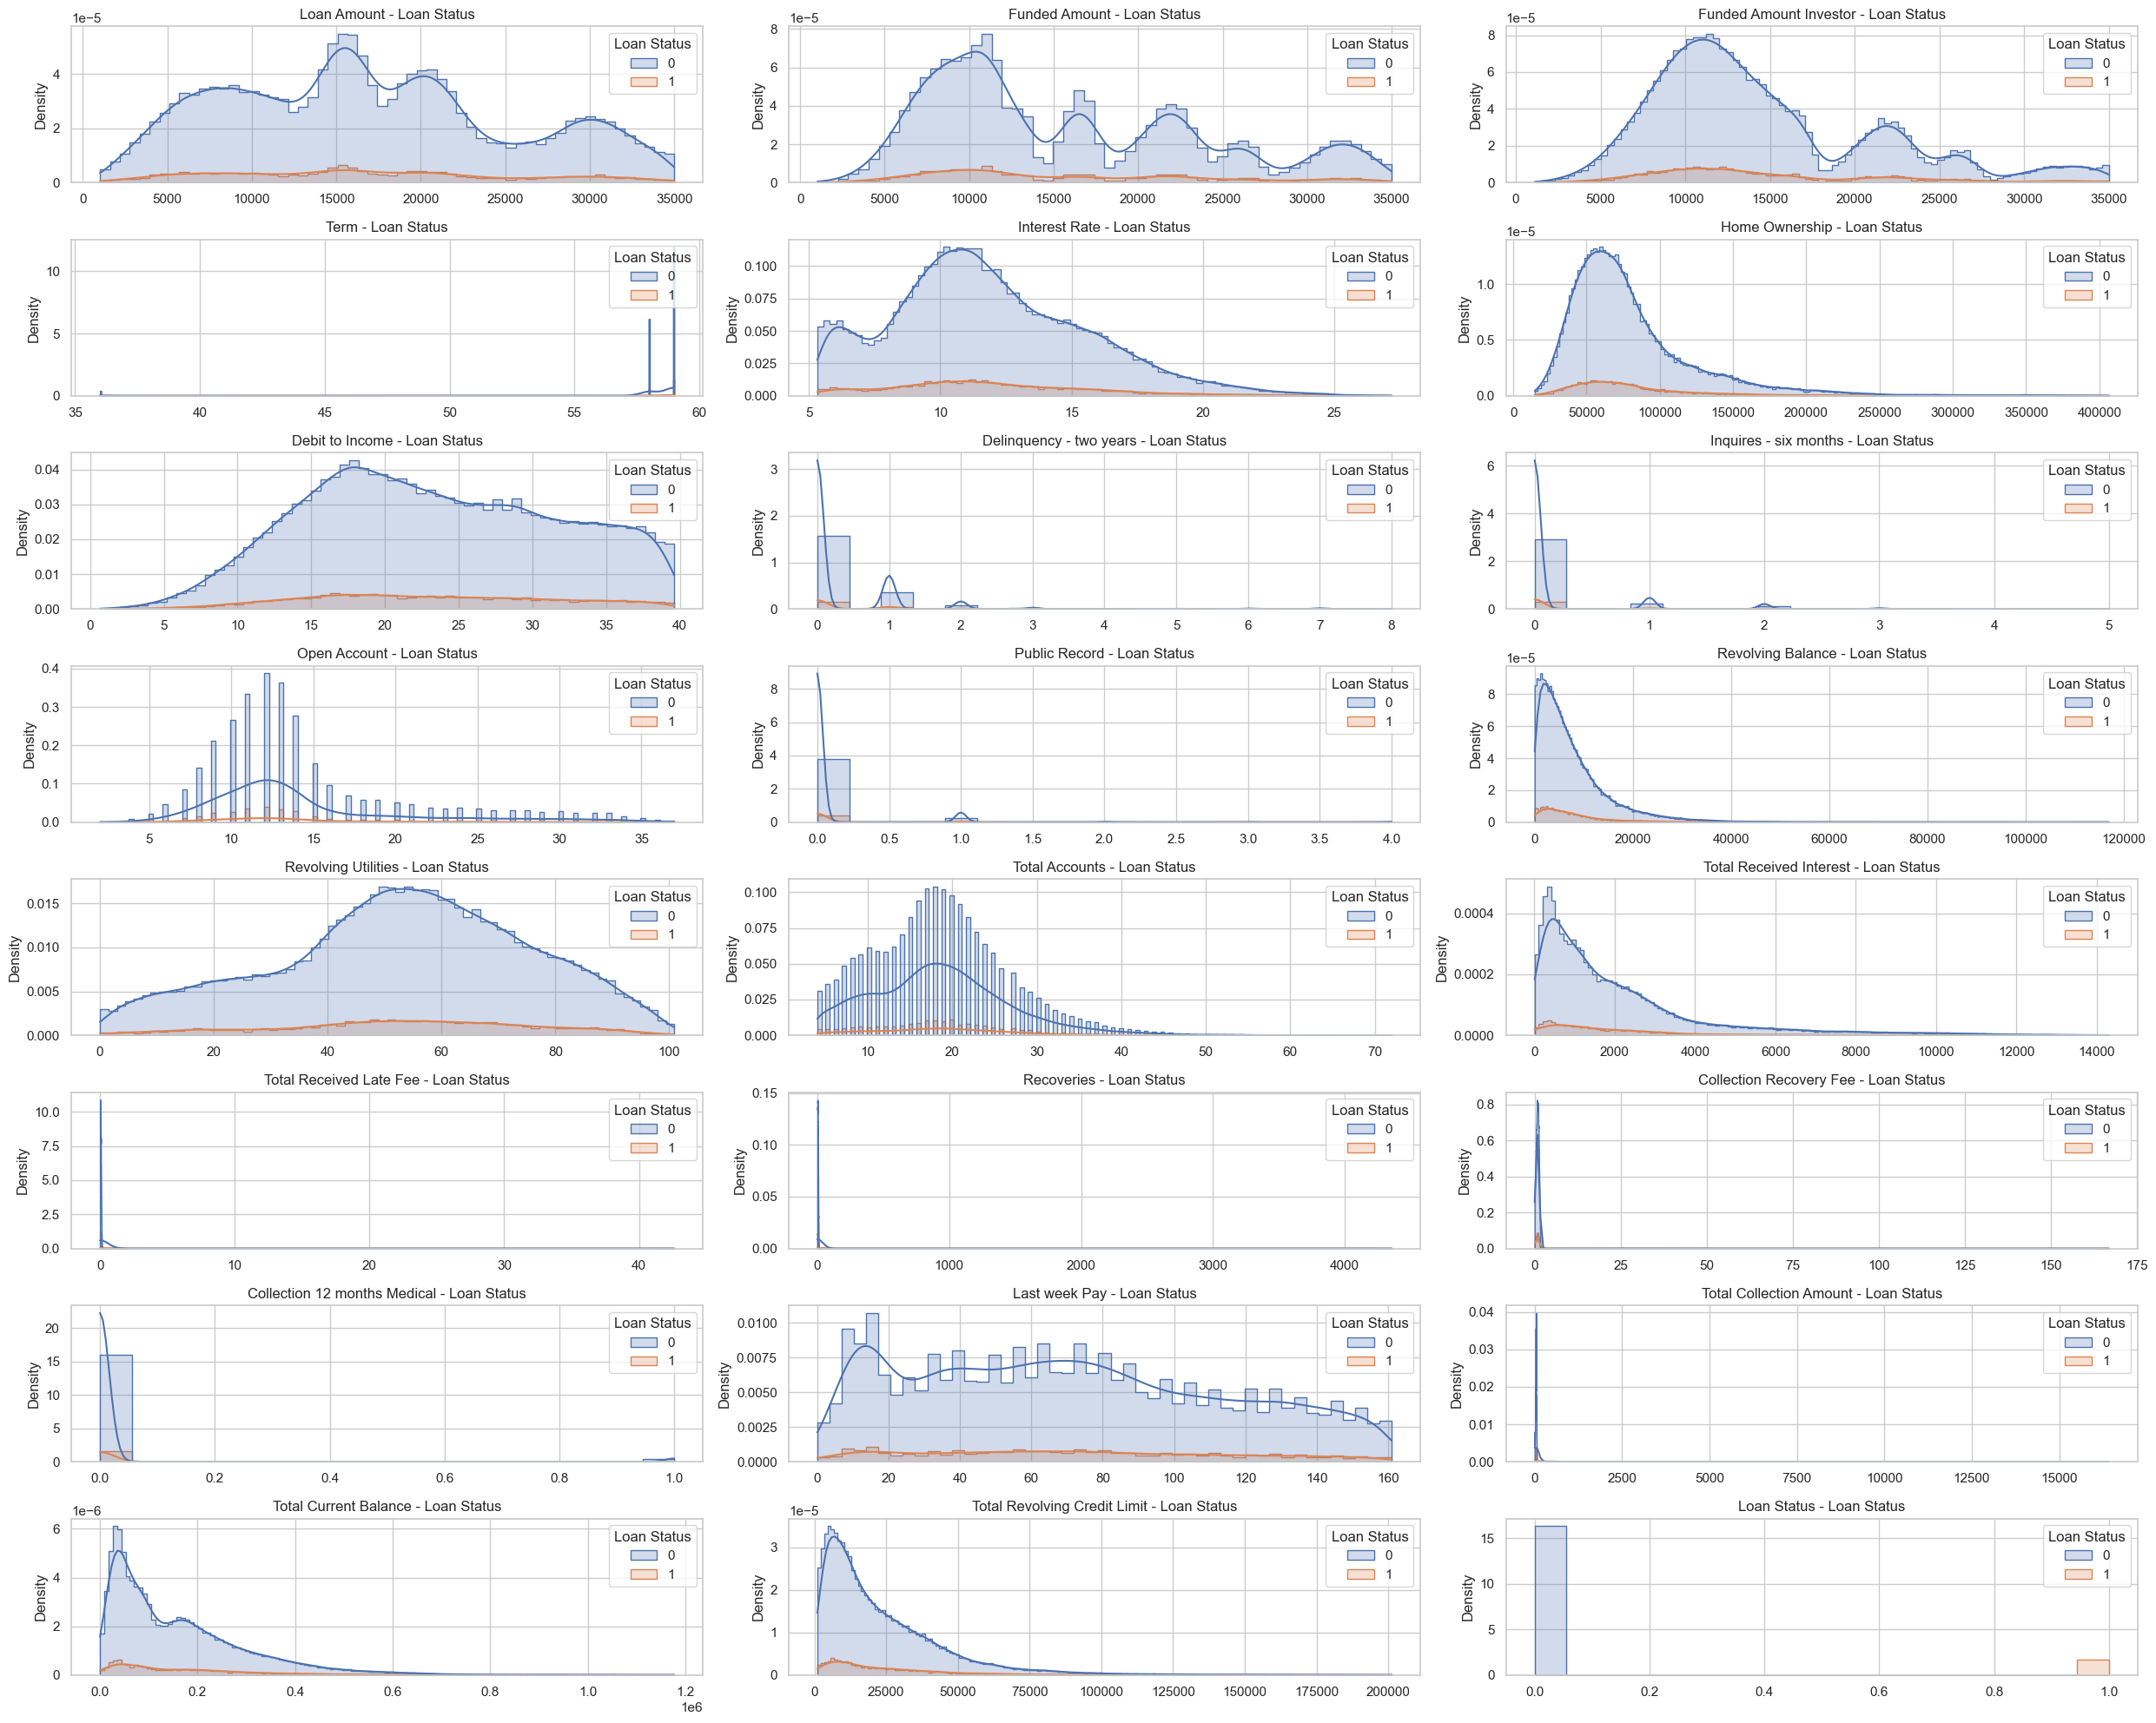

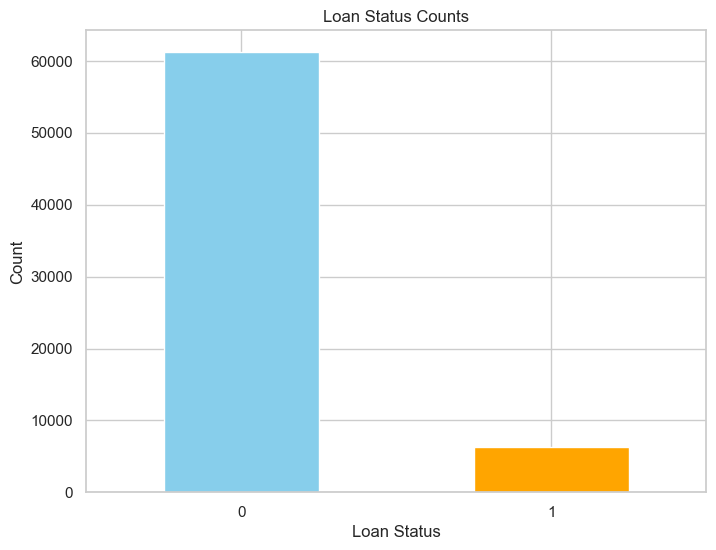

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mudar a coluna do Loan Status para numérica
df['Loan Status'] = df['Loan Status'].astype('int64')

# Boxplot for the numerical attributes
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust the figure size and layout
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, column in enumerate(numerical_attributes, 1):
    ax = plt.subplot(8, 3, i)
    sns.histplot(data=df, x=column, hue='Loan Status', kde=True, element="step", stat="density")
    
    # Set an empty label for the x-axis
    ax.set_xlabel("")
    
    # Set the title without overlapping x-axis numbers of the plot above
    ax.set_title(f"{column} - Loan Status")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Loan Status counts
loan_status_counts = df['Loan Status'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Correlation Matrix:
                              Loan Amount  Funded Amount  \
Loan Amount                      1.000000      -0.000551   
Funded Amount                   -0.000551       1.000000   
Funded Amount Investor           0.002831       0.010227   
Term                             0.004277      -0.001503   
Interest Rate                   -0.004888       0.002310   
Home Ownership                   0.016691      -0.003518   
Debit to Income                  0.007959       0.002347   
Delinquency - two years         -0.000469       0.011313   
Inquires - six months            0.008962      -0.001587   
Open Account                     0.009088       0.005755   
Public Record                   -0.002542       0.003750   
Revolving Balance               -0.001738      -0.004485   
Revolving Utilities              0.014828       0.004460   
Total Accounts                  -0.002071       0.008298   
Total Received Interest         -0.001887       0.002759   
Total Received Late 

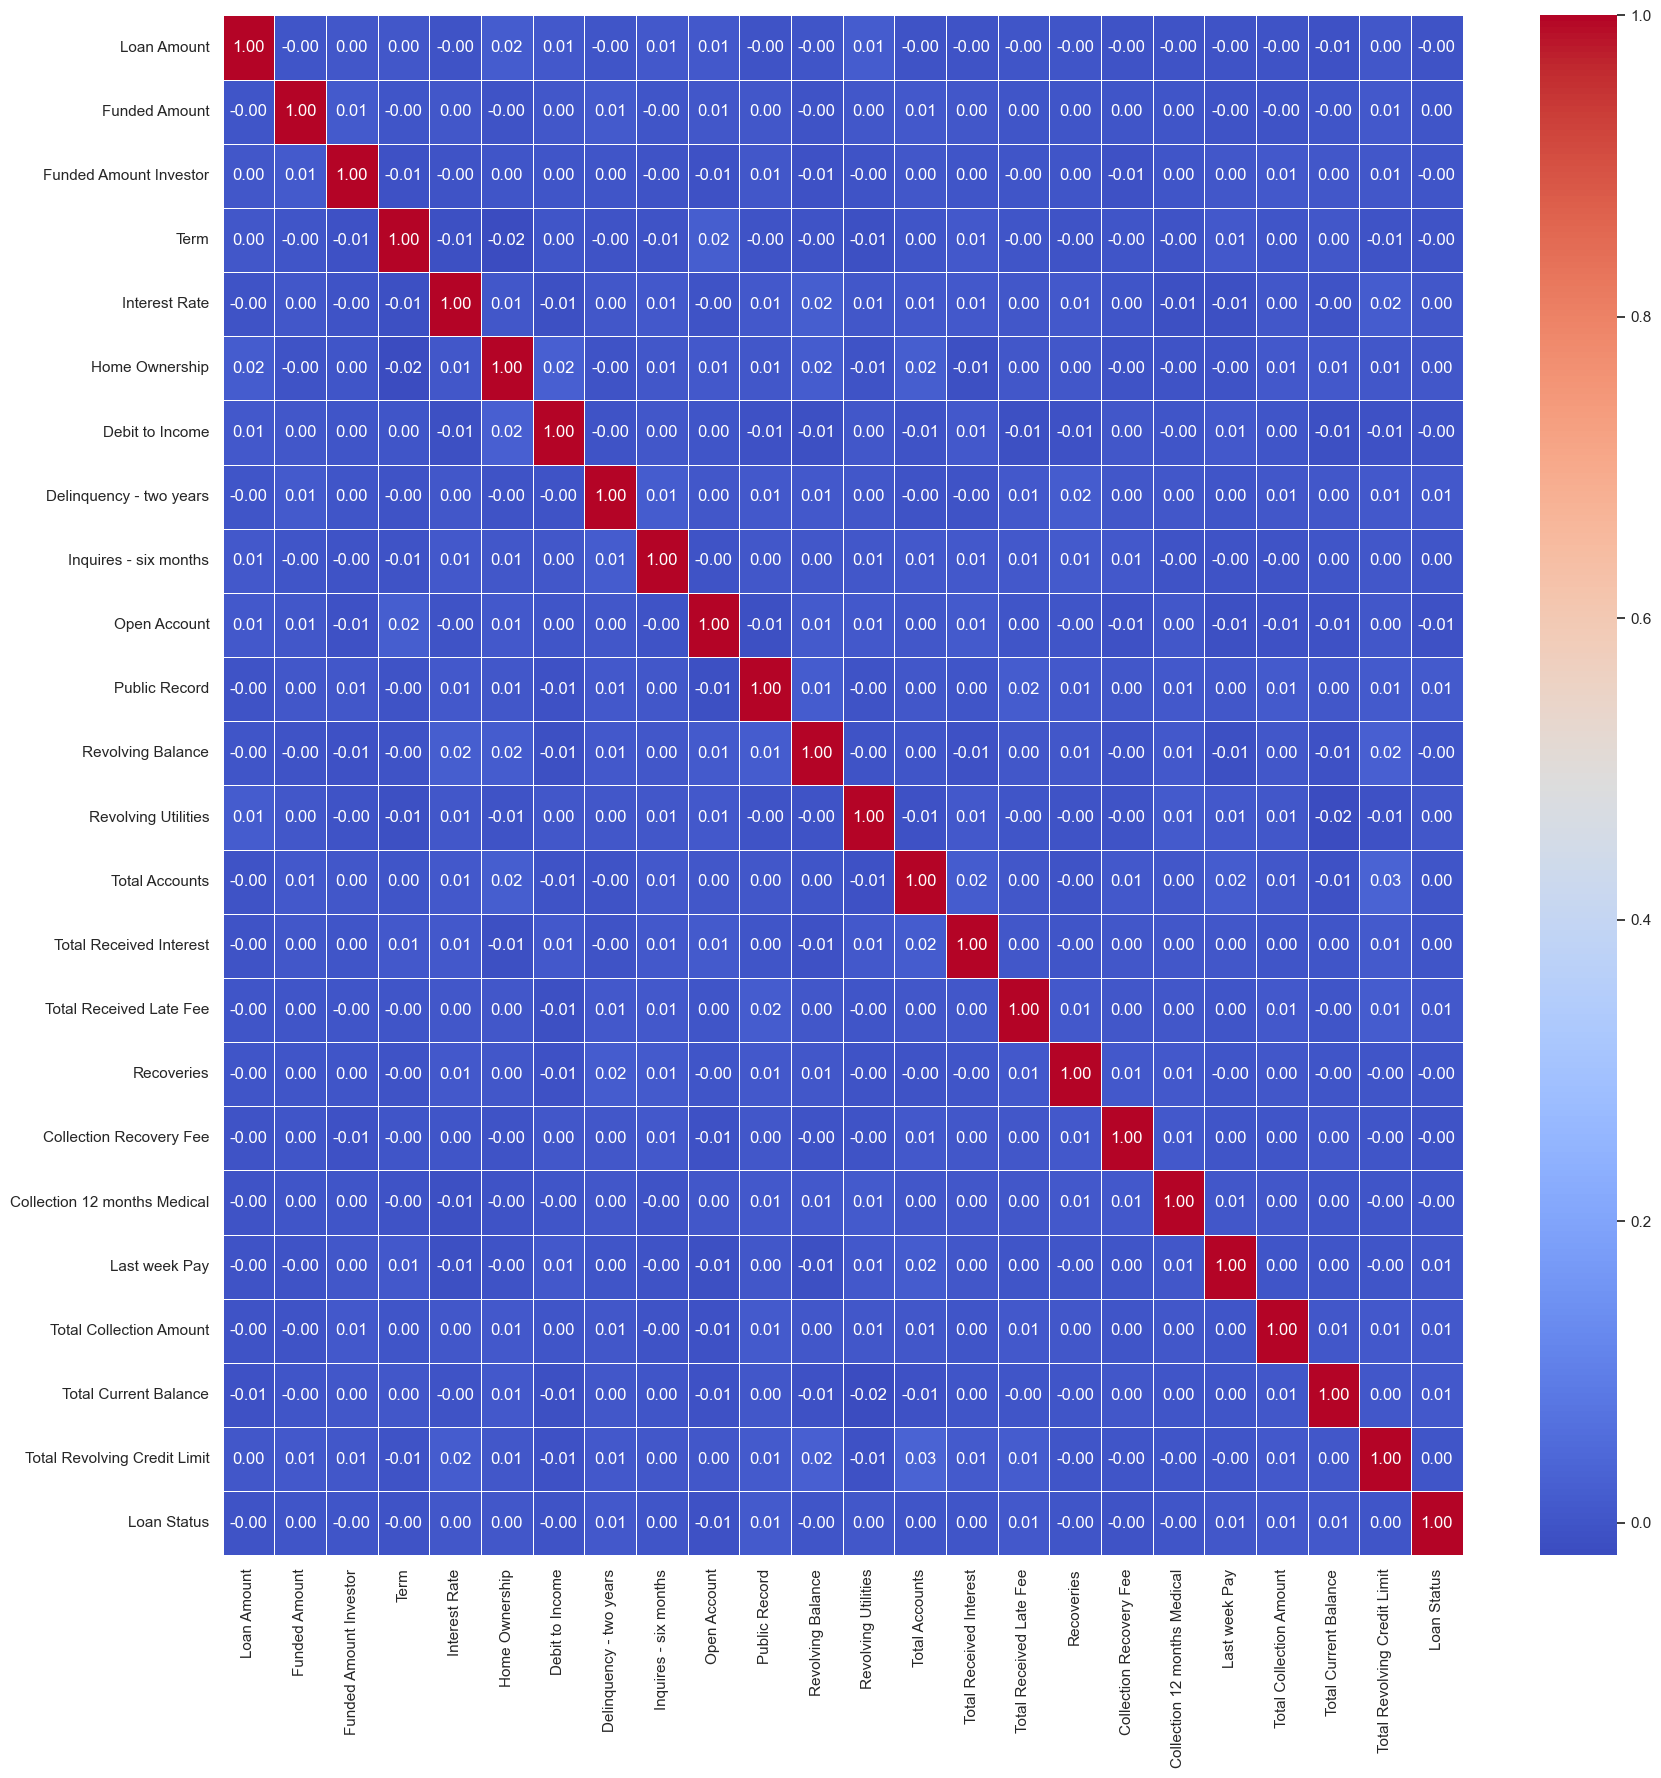

In [47]:
#Mudar a coluna do Loan Status para numérica
df['Loan Status'] = df['Loan Status'].astype('int64')

# Assuming df contains numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the heatmap
plt.show()

In [48]:
data_types_all_columns = df.dtypes
print("Data Types of All Columns:")
print(data_types_all_columns)

Data Types of All Columns:
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Interest Rate                   float64
Grade                            object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64
Collection Recovery Fee         float64
Collection 12